**Note**: many of the jupyter notebooks provided here have SVG figures as cell outputs, which will only be displayed by JupyterLab or Jupyter Notebook if the notebook is marked as **trusted** (In JupyterLab: Ctrl+Shift+C -> Trust Notebook).

# Data Input

There are 3 alternatives to import wind farm layout data for use within **optiwindnet**:
- optiwindnet API
- `.yaml` file
- `.osm.pbf` file

In [1]:
from optiwindnet.api import WindFarmNetwork

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


## Option 0: Use the optiwindnet API from Python

In [2]:
from itertools import pairwise

In [3]:
import numpy as np

In [4]:
# all coordinates are sequences of (x, y) pairs
# if input coordinates are in arrays X and Y, use `np.hstack((X, Y))`
border = np.array( # coordinate sequence defines the polygon, last-first segment implicit
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)
obstacles = [
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]
substations = np.array([[696, 1063],], dtype=float)
turbines = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)
cables = [(3, 206), (5, 287), (7, 406)]

In [5]:
wfn1 = WindFarmNetwork(turbines=turbines, substations=substations, cables=cables, border=border, obstacles=obstacles)

<Axes: >

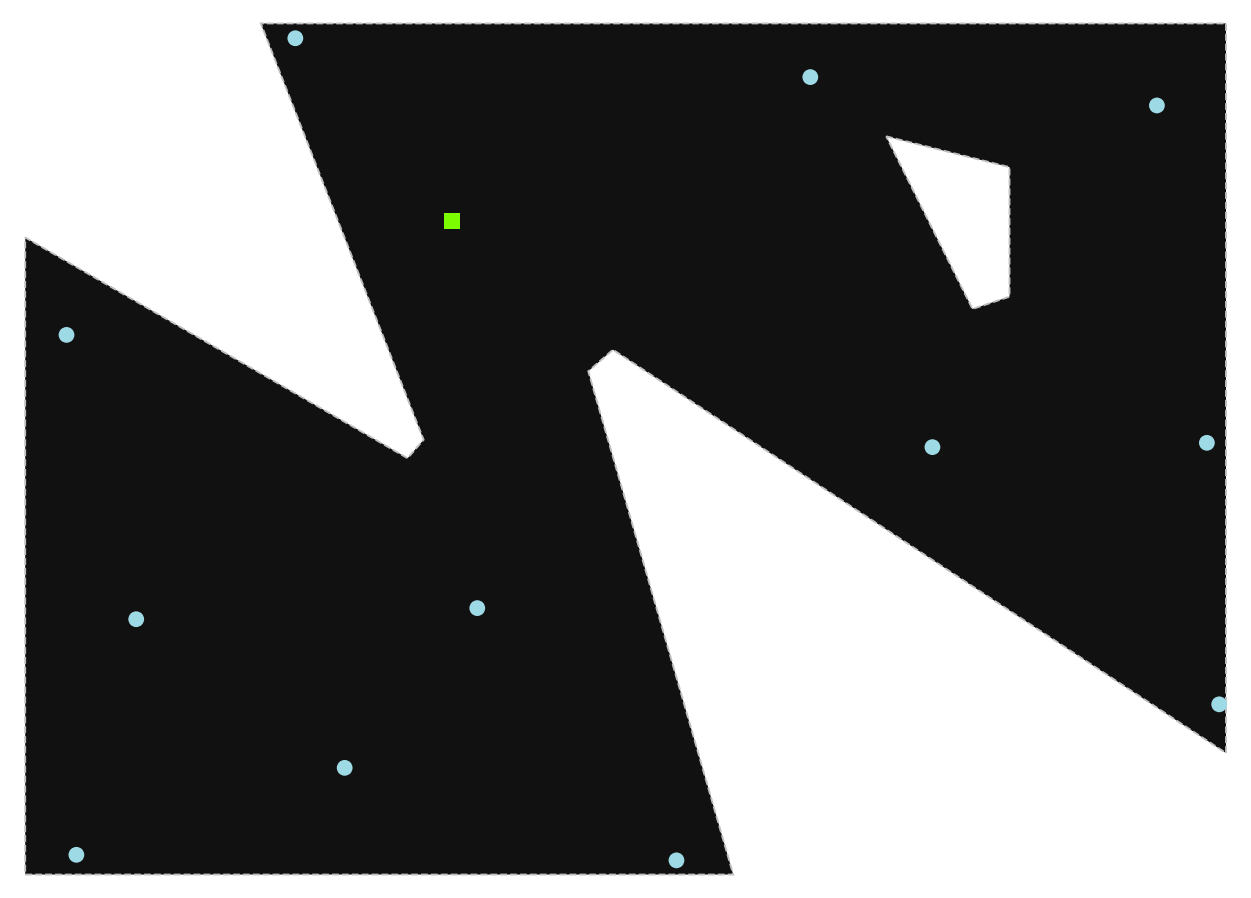

In [6]:
wfn1.plot_location()

## Option 1: YAML input file

In [7]:
with open('data/example_location.yaml', 'w') as yaml_file:
    yaml_file.write('''
# coordinate format can be "planar" or "latlon"
#   - for "latlon" examples, see `optiwindnet/data/*.yaml`
#   - this field is optional, default is "latlon"
#   - coordinates are converted to floats, so floats may be used as well
COORDINATE_FORMAT: planar

# extents define a polygon:
#   - do not repeat the initial vertex at the end
#   - line breaks are optional
EXTENTS: [
  [1951, 200],
  [1951, 1383],
  [386, 1383],
  [650, 708],
  [624, 678],
  [4, 1036],
  [4, 3],
  [1152, 3],
  [917, 819],
  [957, 854]
]

# obstacles is optional and must be a list of polygons (even if 1 obstacle)
OBSTACLES: [
  [  # first obstacle
    [1540, 920],
    [1600, 940],
    [1600, 1150],
    [1400, 1200],
  ],
  # [second obstacle]
]

SUBSTATIONS: [
  [696, 1063],
]

TURBINES: [
  [1940, 279],
  [1920, 703],
  [1475, 696],
  [1839, 1250],
  [1277, 1296],
  [442, 1359],
  [737, 435],
  [1060, 26],
  [522, 176],
  [87, 35],
  [184, 417],
  [71, 878],
]
''')

In [8]:
wfn2 = WindFarmNetwork.from_yaml('data/example_location.yaml', cables=cables)

<Axes: >

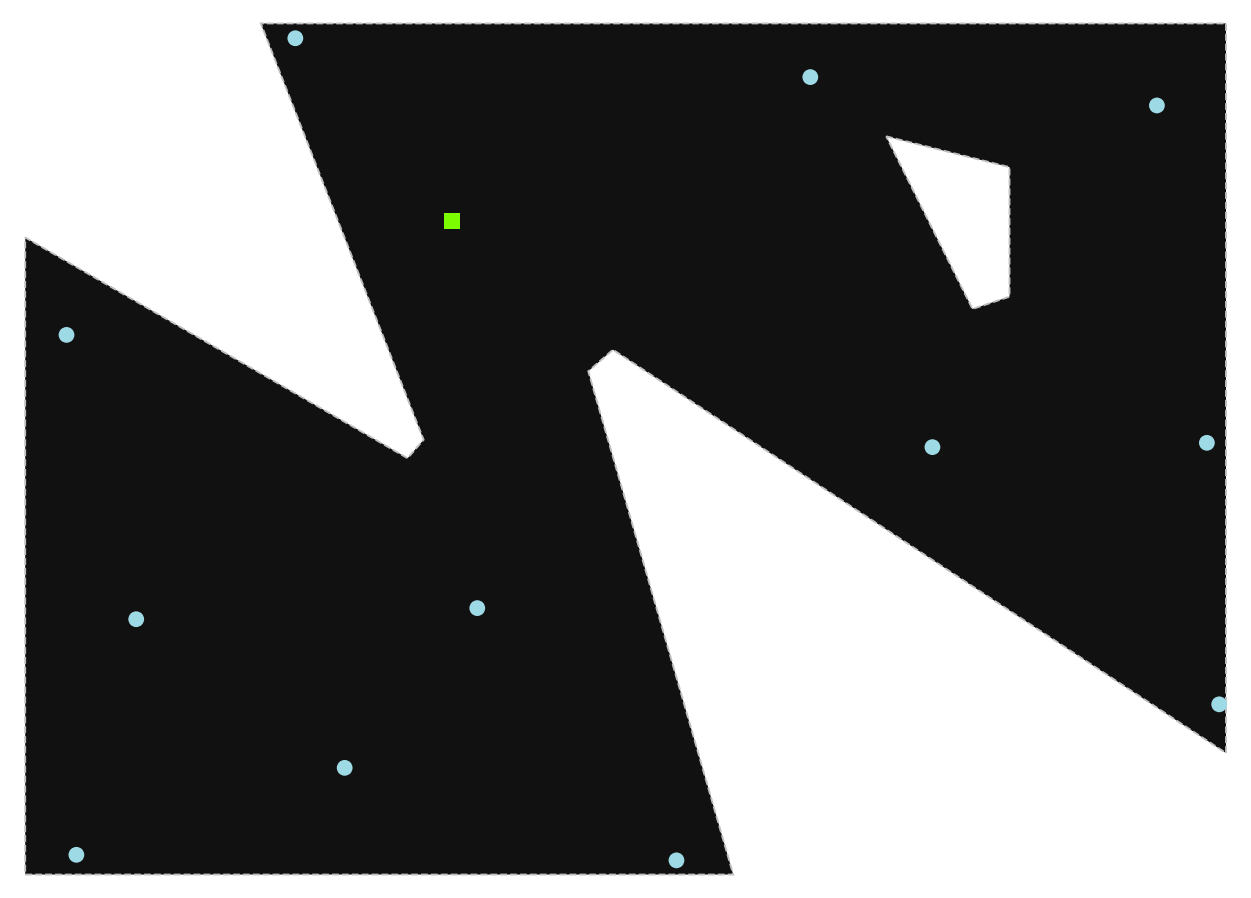

In [9]:
wfn2.plot_location()

## Option 2: OSM.PBF input file (aka OpenStreetMap protobuffer format)

Use of the JOSM open-source map editor is recommended if using this format: <https://josm.openstreetmap.de/>.

See `optiwindnet/data/*.osm.pbf` for more examples.

`.osm.pbf` format does not support obstacles at the moment.

In [10]:
wfn3 = WindFarmNetwork.from_pbf('data/example_location.osm.pbf', cables=cables)

<Axes: >

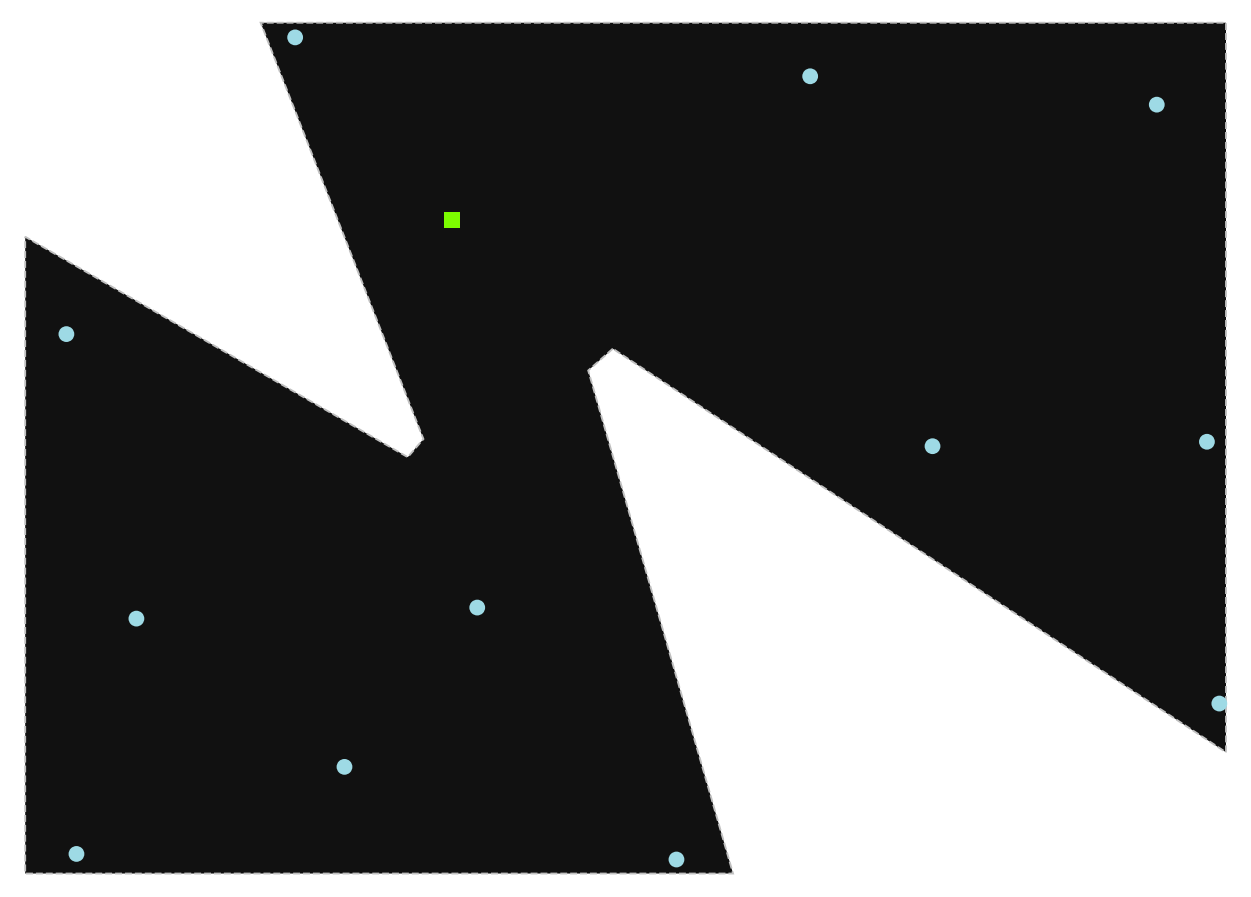

In [11]:
wfn3.plot_location()